<font size="+3"><strong>ACNE AND ECZEMA</strong><font>

<font size="+2"><strong>EDA and Prep</strong><font>

In [14]:
# imports
import os

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.optimizers import RMSprop, Adam

from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [15]:
# Define directories
base_dir = "Aczema"
train_dir = os.path.join(base_dir, "train")
val_dir = os.path.join(base_dir, "test")

train_acne_dir = os.path.join(train_dir, "acne")
train_eczema_dir = os.path.join(train_dir, "eczema")

val_acne_dir = os.path.join(val_dir, "acne")
val_eczema_dir = os.path.join(val_dir, "eczema")

In [16]:
# Check the filenames
eczema_fnames_train = os.listdir(train_eczema_dir)
eczema_fnames_test = os.listdir(val_eczema_dir)

acne_fnames_train = os.listdir(train_acne_dir)
acne_fnames_test = os.listdir(val_acne_dir)

In [17]:
# check no. of files
print(f"Number of train eczema files: {len(eczema_fnames_train)}")
print(f"Number of test eczema files: {len(eczema_fnames_test)}")
print(eczema_fnames_train[:10])
print()
print(f"Number of train atopic dermatitis files: {len(acne_fnames_train)}")
print(f"Number of test atopic dermatitis files: {len(acne_fnames_test)}")
print(acne_fnames_train[:10])

Number of train eczema files: 2177
Number of test eczema files: 1000
['eczema_3178.jpg', 'eczema_398.jpg', 'eczema_116.jpg', 'eczema_1784.jpg', 'eczema_666.jpg', 'eczema_3025.jpg', 'eczema_1169.jpg', 'eczema_2957.jpg', 'eczema_2393.jpg', 'eczema_2898.jpg']

Number of train atopic dermatitis files: 2177
Number of test atopic dermatitis files: 1000
['acne_482.jpg', 'acne_999.jpg', 'acne_2787.jpeg', 'acne_462.jpg', 'acne_63.jpg', 'acne_2641.jpeg', 'acne_670.jpg', 'acne_2144.jpeg', 'acne_1749.jpg', 'acne_193.png']


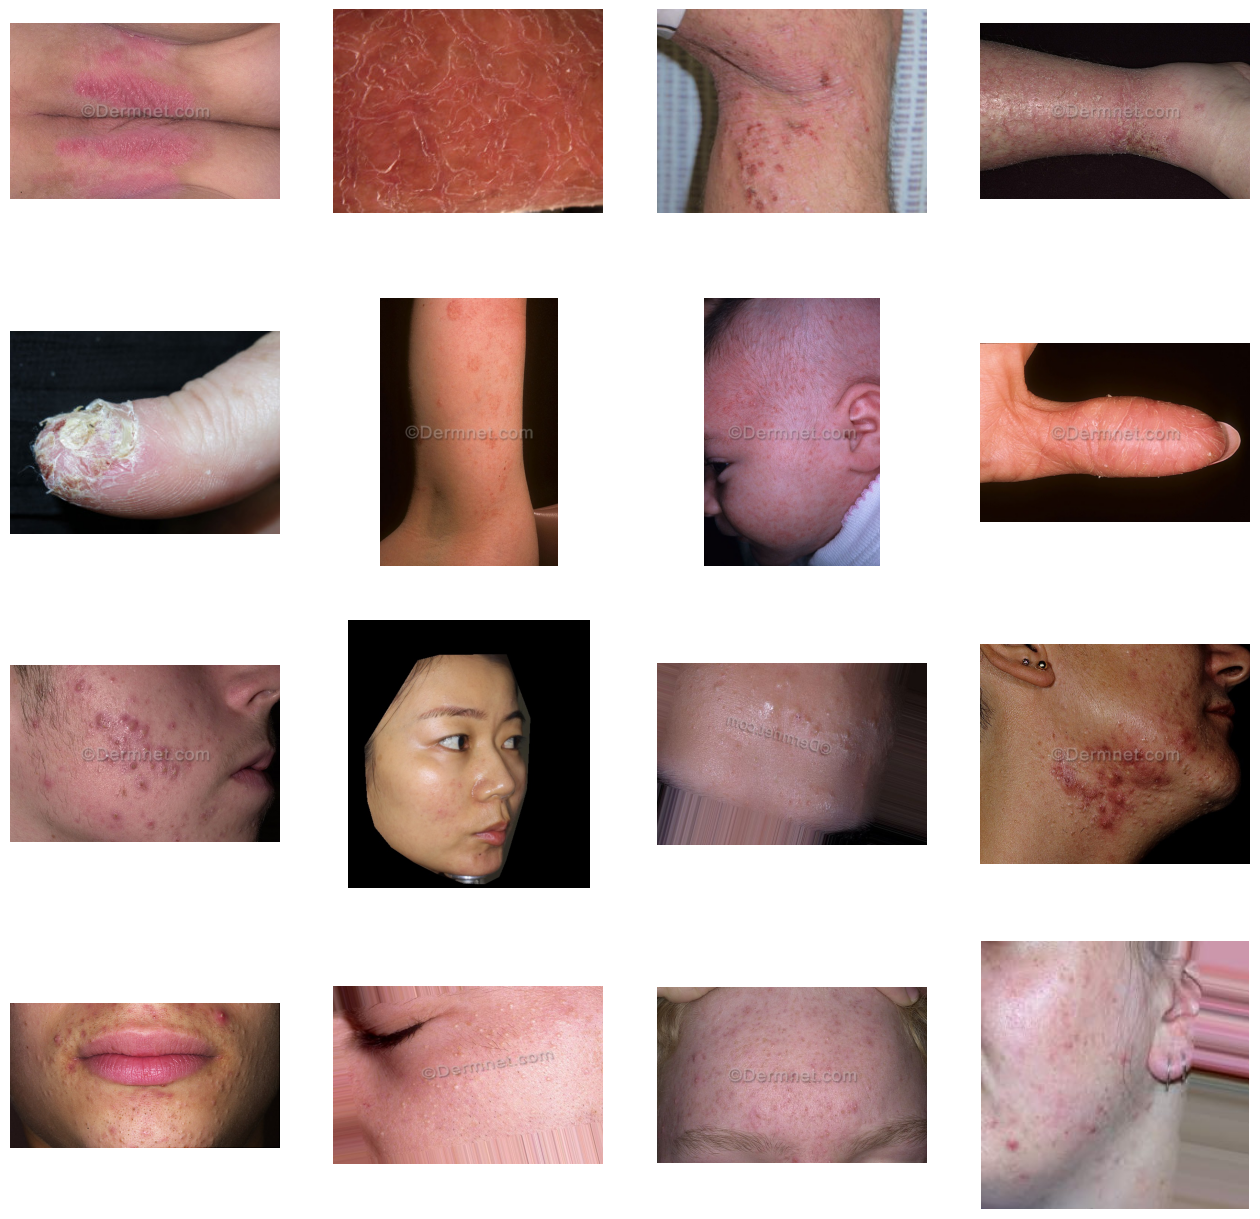

In [18]:
# Visualize
# Graph configurations
row, col = (4, 4)
index = 0

# 4pics per row
fig = plt.gcf()
fig.set_size_inches(col*4, row*4)

index += 8
nxt_eczm_photos = [os.path.join(train_eczema_dir, name)
                   for name in eczema_fnames_train[index-8: index]]
nxt_acne_photos = [os.path.join(train_acne_dir, name)
                   for name in acne_fnames_train[index-8: index]]

for i, photo_path in enumerate(nxt_eczm_photos+nxt_acne_photos):
    subplots = plt.subplot(row, col, i+1)  # start index at 1 instead of 0
    subplots.axis("Off")  # remove gridlines

    photo = mpimg.imread(photo_path)
    plt.imshow(photo)

plt.show()

<font size="+2"><strong>Build Model</strong><font>

In [25]:
# Start with 3 layers (convolutional, relu, maxpooling)
img_input = layers.Input(shape=(150, 150, 3))

# 16 filters that are 3x3 and relu activation
# 2x2 Maxpooling layer
x = layers.Conv2D(16, 3, activation='relu')(img_input)
x = layers.MaxPooling2D(2)(x)


x = layers.Conv2D(32, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

x = layers.Conv2D(64, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

x = layers.Conv2D(128, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

# x = layers.Conv2D(256, 3, activation='relu')(x)
# x = layers.MaxPooling2D(2)(x)

# + 2 fully connected layers
x = layers.Flatten()(x)  # flatten to 1D to add connected layers
x = layers.Dense(512, activation='relu')(x)  # fully connected layer 1: 512 hidden units
x = layers.Dropout(0.5)(x) # Dealing with overfitting
output = layers.Dense(1, activation='sigmoid')(x)  # 1 output node n sigmoid activatn


In [26]:
# Build model and connect it
model = Model(img_input, output)

In [27]:
# Summary
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 conv2d_14 (Conv2D)          (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d_14 (MaxPooli  (None, 74, 74, 16)        0         
 ng2D)                                                           
                                                                 
 conv2d_15 (Conv2D)          (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_15 (MaxPooli  (None, 36, 36, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_16 (Conv2D)          (None, 34, 34, 64)        1849

In [28]:
# Train model with BinaryCrossEntropy loss and RMSprop optimizer
model.compile(loss='binary_crossentropy',
             optimizer=Adam(learning_rate=0.0001),
             metrics=['acc'])

<font size="+2"><strong>Preprocessing</strong><font>

In [29]:
# Rescale [0, 1] and data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
)
val_datagen = ImageDataGenerator(rescale=1./255)

# Flow images to rescale
train_gen = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size=30,
    class_mode='binary',
    classes=['acne', 'eczema']  # acne[0](-ve), eczema[1](+ve)
)

val_gen = val_datagen.flow_from_directory(
    val_dir,
    target_size=(150,150),
    batch_size=30,
    class_mode='binary',
    classes=['acne', 'eczema']
)

Found 4353 images belonging to 2 classes.
Found 1999 images belonging to 2 classes.


In [30]:
# Train
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(
    train_gen,
    steps_per_epoch=145,
    epochs=30,
    validation_data=val_gen,
    validation_steps=67,
    callbacks=[early_stopping],
    verbose=2
)


# history = model.fit(
#     train_gen,
#     steps_per_epoch=145, # x * 20(batch size) = 3177 (total training data) --> 30: 145
#     epochs=5,
#     validation_data=val_gen,
#     validation_steps=67, # x * 20(batch size) = 3175 (total testing data)  --> 30: 67
#     verbose=2
# )

Epoch 1/30
145/145 - 139s - loss: 0.6489 - acc: 0.5813 - val_loss: 0.6035 - val_acc: 0.6513 - 139s/epoch - 958ms/step
Epoch 2/30
145/145 - 178s - loss: 0.5665 - acc: 0.6840 - val_loss: 0.5359 - val_acc: 0.6938 - 178s/epoch - 1s/step
Epoch 3/30
145/145 - 235s - loss: 0.5220 - acc: 0.7231 - val_loss: 0.4735 - val_acc: 0.7599 - 235s/epoch - 2s/step
Epoch 4/30
145/145 - 181s - loss: 0.5012 - acc: 0.7398 - val_loss: 0.5408 - val_acc: 0.7204 - 181s/epoch - 1s/step
Epoch 5/30
145/145 - 203s - loss: 0.4813 - acc: 0.7455 - val_loss: 0.4448 - val_acc: 0.7829 - 203s/epoch - 1s/step
Epoch 6/30
145/145 - 176s - loss: 0.4787 - acc: 0.7560 - val_loss: 0.5065 - val_acc: 0.7424 - 176s/epoch - 1s/step
Epoch 7/30
145/145 - 244s - loss: 0.4762 - acc: 0.7615 - val_loss: 0.4819 - val_acc: 0.7529 - 244s/epoch - 2s/step
Epoch 8/30
145/145 - 222s - loss: 0.4599 - acc: 0.7652 - val_loss: 0.4985 - val_acc: 0.7519 - 222s/epoch - 2s/step
Epoch 9/30
145/145 - 213s - loss: 0.4588 - acc: 0.7617 - val_loss: 0.4550 - v

In [31]:
# Get the accuracy values from the history
training_accuracy = history.history['acc']
validation_accuracy = history.history['val_acc']

# Print the final accuracy values
print(f"Final Training Accuracy: {training_accuracy[-1]:.4f}")
print(f"Final Validation Accuracy: {validation_accuracy[-1]:.4f}")

Final Training Accuracy: 0.8105
Final Validation Accuracy: 0.8094


<font size="+2"><strong>Evaluation</strong><font>

In [32]:
# Get accuracy and loss
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

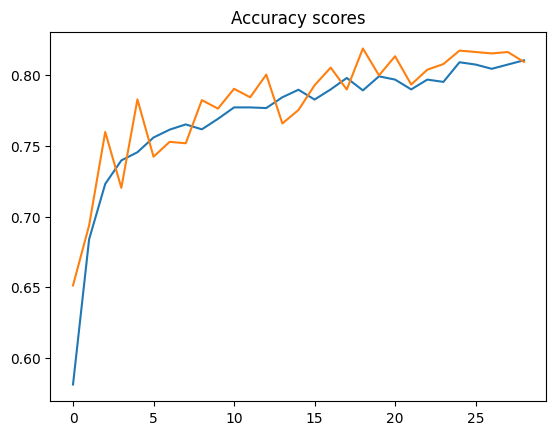

In [33]:
# Plot accuracy
plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title("Accuracy scores");


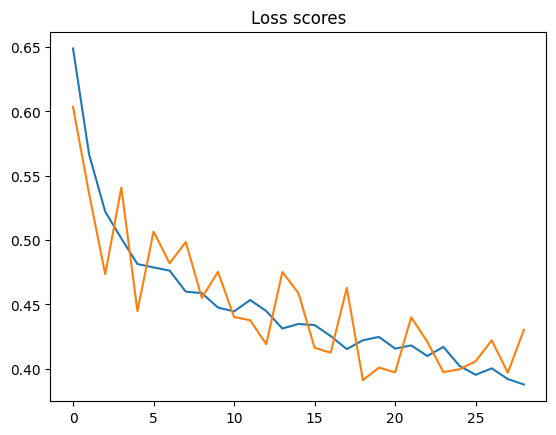

In [34]:
# Plot accuracy
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title("Loss scores");


In [35]:
model.save("./asset4")

INFO:tensorflow:Assets written to: ./asset4/assets


INFO:tensorflow:Assets written to: ./asset4/assets


### 

<font size="+2"><strong>Predictions</strong><font>

In [4]:
# Example usage for loading the model later
from tensorflow.keras.models import load_model

# model1 = load_model("../assets/")
model2 = load_model("asset2/")
model3 = load_model("asset3/")  # the best

from tensorflow.keras.preprocessing import image
import numpy as np

# Load an image for prediction
img_path = "testImages/testa.jpeg"
img = image.load_img(img_path, target_size=(150, 150))
img_array = image.img_to_array(img)

# Rescale the image array
img_array /= 255.0

# Expand dimensions to match the input shape expected by the model
img_array = np.expand_dims(img_array, axis=0)

# Make predictions
#pred1 = model1.predict(img_array)
#pred = model.predict(img_array)
pred2 = model2.predict(img_array)
pred3 = model3.predict(img_array)

# Assuming binary classification, you can interpret the result
# if pred[0] < 0.1:
#     print("Prediction: Not acne or eczema")
# elif pred[0] > 0.6:
#     print("Prediction: Eczema")
# else:
#     print("Prediction: Acne")

if pred2[0] > 0.6:
    print("Prediction: Eczema")
else:
    print("Prediction: Acne")

if pred3[0] > 0.6:
    print("Prediction: Eczema")
else:
    print("Prediction: Acne")

1/1 [==============================] - 0s 98ms/step
Prediction: Eczema
Prediction: Eczema
